# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will investigate the data set of 100k medical appointments across hospitals in Brazil. We will look at the factors that can help us predict whether or not a patient will show up to their appointment.

In [700]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

Below is the structure of data in the csv file downloaded from Udacity's database. Since there are many spelling errors in the column names, we would need to rename the columns. Patient ID and Appointment ID are the columns we would need to drop as they are not going to contributre to our analysis. 

In [701]:
# Load the data and print out a few lines
df = pd.read_csv("no_shows.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The output below tells us that there are 110527 rows and 14 columns in the "df" data frame.

In [702]:
df.shape

(110527, 14)

The following command informs us about number of non-null entries and the data types for each column. We do not have to deal with missing data since number of non-null values for each column equals the total number rows.

In [704]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Bellow is the summary statistics of the data. A quick look at this chart can help us spot any unusual values and help us determine what cleaning operations should be performed. One unusual value is the minumum age of -1 in the Age column. We can replace this value with the mean age.

In [705]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Also we will need to check for duplicates in our data. We will not have to deal with duplicates, since no duplicates were found according to the code below.

In [707]:
# check for duplicates in the data
sum(df.duplicated())

0

### Data Cleaning (Replace this with more specific notes!)

In order to correct the spelling errors in the column names and standardize them we should rename the columns.

In [708]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [709]:
# assigning new labels to columns in dataframe
labels = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms', 'no_show' ]
df.columns = labels
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Since we are not going to use patient and appointment ID-s in our data analysis, we can drop them from the dataframe.

In [710]:
df.drop(columns = ['patient_id', 'appointment_id'], axis = 1, inplace = True)
df.head()

,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Since we are not going to care about handicap level for our analysis, we can convert all handicap levels to just presence or absence of hanicap. 

In [711]:
df.handicap.replace(df.query('handicap > 1')['handicap'], 1, inplace = True)

Next we would need to convert all dates formatted as strings into datetime format to be able to easier manipulate this data. Since we will not need the times, we can just keep the date. After these changes let's check the new data types.

In [712]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'], format = '%Y-%m-%dT%H:%M:%SZ')
df['appointment_day'] = pd.to_datetime(df['appointment_day'], format = '%Y-%m-%dT%H:%M:%SZ')
df['scheduled_day'] = df['scheduled_day'].dt.normalize()
df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighborhood               object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms                         int64
no_show                    object
dtype: object

In [713]:
df['date_range'] = df['appointment_day'] - df['scheduled_day']
df.tail()

,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,date_range
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35 days
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41 days
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41 days
110526,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,41 days


To be able to  calculate statistics easier in the analyzis, we need to create groups of date_range column. First we need to convert it's datatype to float or integer for easier calculation.
We then need to look at the range of values and replace any unusual data, such as values that are less than 0 in this case. 

In [714]:
# convert data type to float
df.date_range = df.date_range.dt.days

In [715]:
df.date_range.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: date_range, dtype: float64

In [716]:
# replace values that are less than 0 with median
df.date_range.replace(df.query('date_range < 0')['date_range'], df.date_range.median(), inplace = True)

In [717]:
# check to make sure there are no more unusual values
df.date_range.describe()

count    110527.000000
mean         10.183973
std          15.254827
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: date_range, dtype: float64

In [718]:
#create date_range bins
df['date_range_bins'] = pd.cut(x = df['date_range'], bins = [-1, 45, 90, 135, 180])
df['date_range_bins'].head()

0    (-1, 45]
1    (-1, 45]
2    (-1, 45]
3    (-1, 45]
4    (-1, 45]
Name: date_range_bins, dtype: category
Categories (4, interval[int64]): [(-1, 45] < (45, 90] < (90, 135] < (135, 180]]

We will also need to create a column with appointment weekday data for the future analyzis. 

In [719]:
# where Monday = 0, Sunday = 6
df['appointment_weekday'] = df['appointment_day'].dt.dayofweek
df.head()

,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,date_range,date_range_bins,appointment_weekday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,"(-1, 45]",4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,"(-1, 45]",4
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,"(-1, 45]",4
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,"(-1, 45]",4
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,"(-1, 45]",4


Let's now replace any less than 0 values from age and create age groups.

In [720]:
# replace less than 0 ages with median
df.age.replace(df.query('age < 0')['age'], df.age.median(), inplace = True)
df.age.describe()

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [721]:
df['age_bins'] = pd.cut(x = df['age'], bins = [-1, 25, 50, 75, 116])
df.head()

,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,date_range,date_range_bins,appointment_weekday,age_bins
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,"(-1, 45]",4,"(50, 75]"
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,"(-1, 45]",4,"(50, 75]"
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,"(-1, 45]",4,"(50, 75]"
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,"(-1, 45]",4,"(-1, 25]"
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,"(-1, 45]",4,"(50, 75]"


In [722]:
df.age_bins = df.age_bins.astype(str)
df.date_range_bins = df.date_range_bins.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
gender                 110527 non-null object
scheduled_day          110527 non-null datetime64[ns]
appointment_day        110527 non-null datetime64[ns]
age                    110527 non-null int64
neighborhood           110527 non-null object
scholarship            110527 non-null int64
hypertension           110527 non-null int64
diabetes               110527 non-null int64
alcoholism             110527 non-null int64
handicap               110527 non-null int64
sms                    110527 non-null int64
no_show                110527 non-null object
date_range             110527 non-null int64
date_range_bins        110527 non-null object
appointment_weekday    110527 non-null int64
age_bins               110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 13.5+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Which columns have higher range of no show frequency within each category?

We will approach this question by comparing the percentages of no shows for each unique category of all relevant columns. We will visualize the differences between maximum and minimum no_show percentages for each column's unique categories to identify the factors, which may be helpful to predict patient no shows.

The following function will calculate and return a list of no_show percentage ranges (max-min) for unique categories in each column.

In [723]:
def perc_range(): #initialize a list, which will contain the ranges of percentages of no shows for each column of interest
    percentage_range = []
    for col in ['gender', 'neighborhood','scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms', 'appointment_weekday', 'date_range_bins', 'age_bins']:
        #initialize a list, which will contain the percentages of no shows for each unique value in a given column
        percentage_no_show = []
        for val in range(df[col].nunique()):
            #calculating percentages of no_shows for each unique value in a given column
            try:
                percentage = df[col][no_show].value_counts()[val]/ (df[col].value_counts()[val])*100
            except:
                percentage = 0 #in case there are 0 no_shows in a given set of values
            percentage_no_show.append(percentage)
        percentage_range.append(max(percentage_no_show)-min(percentage_no_show))        

    return percentage_range    


The following function will create a bar plot using a list input of percentage ranges.

In [724]:
def plot_perc_range(percentage_range): 
    locations = [1,2,3,4,5,6,7,8,9,10,11]
    heights = percentage_range
    labels = ['gender', 'neighborhood','scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms', 'appointment_weekday', 'date_range_bins', 'age_bins']
    plt.figure(figsize = (25,8))     
    plt.rcParams.update({'font.size': 11})
    plt.bar(locations, heights, tick_label = labels)
    plt.xlabel("Category")
    plt.ylabel("Range of percentages of no shows")

After running the two functions above we get the following bar chart. 
The 5 columns with highest ranges of no show frequency are the neighborhood, handicap, sms notifications, the difference between scheduled date and appointment date, as well as age. In the next part we will go in depth of those factors to identify exactly which categories correlate with most no shows. 

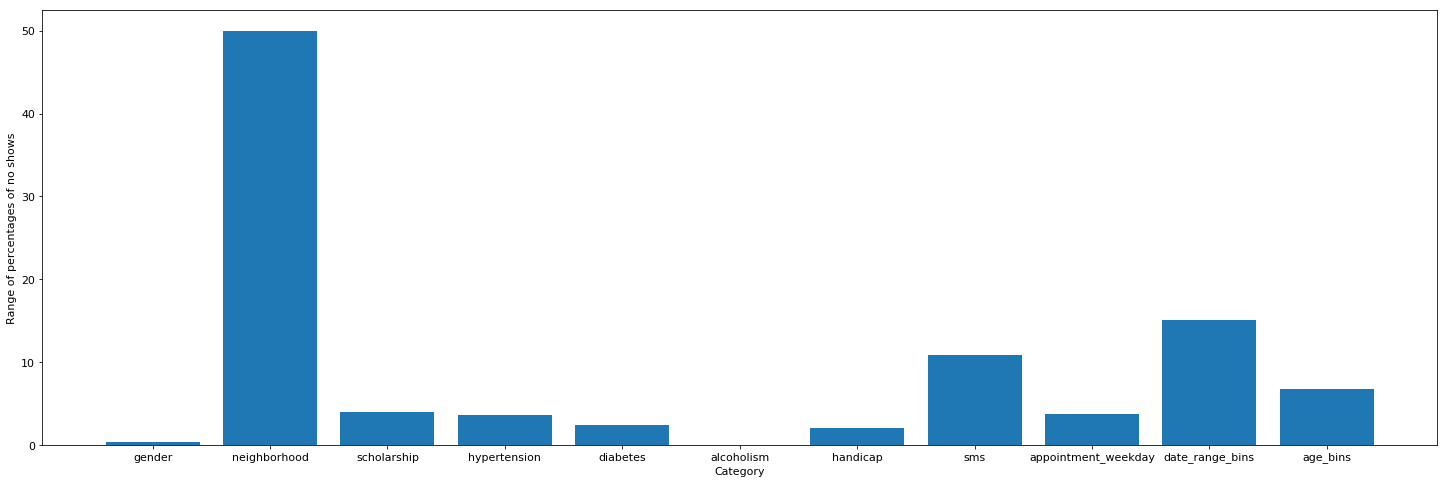

In [726]:
plot_perc_range(perc_range())
    

### Which factors contribute most to no show frequency?
After identifying the columns, which have categories with wide range of no show percentages, we would want to investigate each of those categories individually to find out whether they are actually significant factors.

Let's first look at neighborhood data. Looking at the output below, it is clear that some neighborhoods have low count, which are statistically unreliable for calculating no show percentages. The high range of the no show percentages between the neighborhoods could be comming from including those neighborhoods in our calculation. 

In [727]:
df['neighborhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In order to find out whether the chances of patients not showing up to their appointments correlates with particular neighborhoods, we will need to look at no show percentages between neighborhoods with higher counts. To do so, we will look at percentages of no shows of the neighbordhood with counts greater than 300. Looking at the chart below, we can see small differences between neighborhoods' no show percentages. Looks like the range here is about 10%, which is significantly less than the 50% range calculated above, where we includeded neighborhoods with lower counts.

In [728]:
def neighborhood_noshow():
    col = 'neighborhood'
    percentage_no_show = []
    labels = df[col].value_counts().index.tolist()
    labels1 = labels[:65]
    for val in range(df[col].nunique()-16):
        #calculating percentages of no_shows for each unique value in a given column
        try:
            percentage = df[col][no_show].value_counts()[val]/ (df[col].value_counts()[val])*100
        except:
            percentage = 0 #in case there are 0 no_shows in a given set of values
        percentage_no_show.append(percentage)
    locations = [x+1 for x in range(df[col].nunique()-16)]
    heights = percentage_no_show
    plt.figure(figsize = (30,8))     
    plt.rcParams.update({'font.size': 11})
    plt.xticks(rotation = 'vertical')
    plt.bar(locations, heights, tick_label = labels1)
    plt.xlabel("Category")
    plt.ylabel("% no shows")


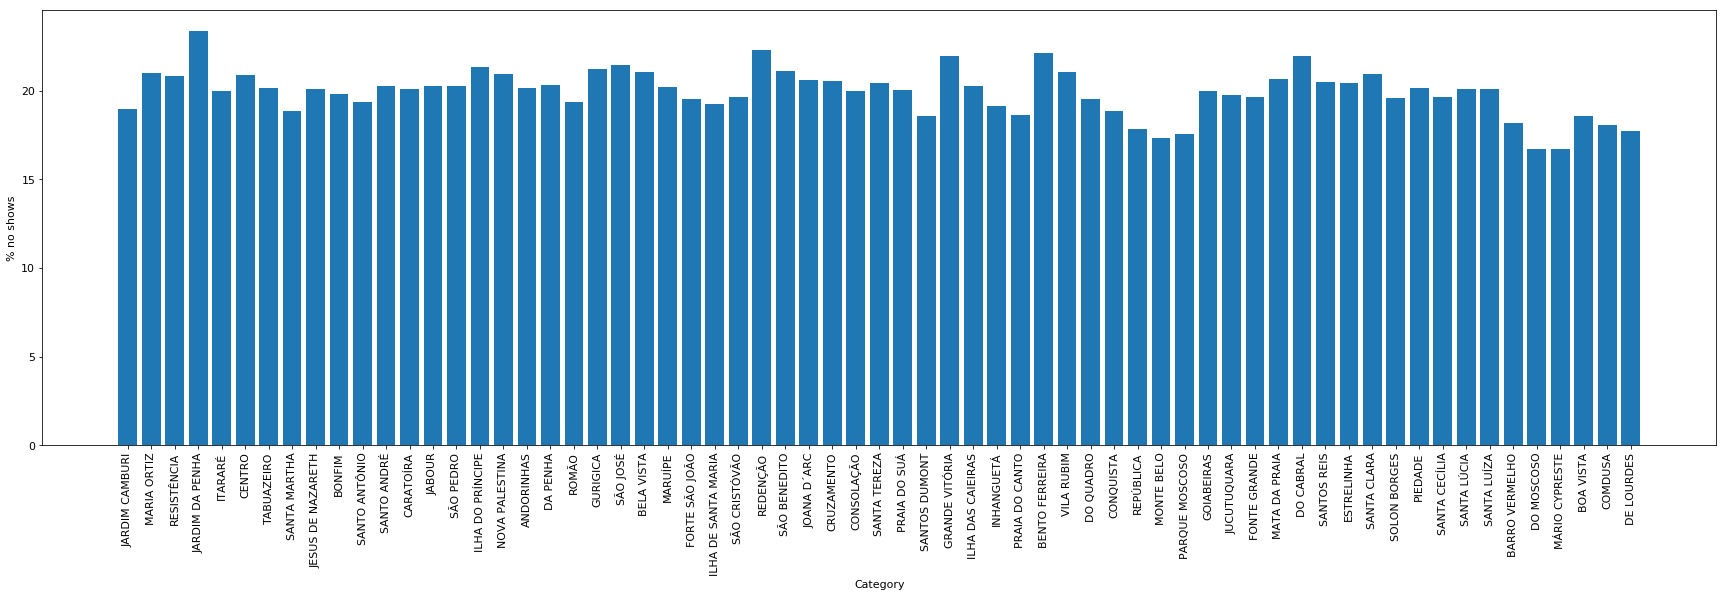

In [729]:
neighborhood_noshow()

Let's now look at the other categories among the top 5 no show percentage ranges. Like in the previous example, we will need to look at value counts first to make sure that we are calculating the percentages on variables with high enough counts, which are statistically reliable.

In [730]:
df.date_range_bins.value_counts()

(-1, 45]      106654
(45, 90]        3656
(90, 135]        151
(135, 180]        66
Name: date_range_bins, dtype: int64

In [731]:
df.handicap.value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

In [732]:
df.sms.value_counts()

0    75045
1    35482
Name: sms, dtype: int64

In [673]:
df.age_bins.value_counts()

(-1, 25]     38599
(25, 50]     36505
(50, 75]     30031
(75, 116]     5392
Name: age_bins, dtype: int64

In [733]:
def plot_perc_col(col, tit, xlab):
    percentage_no_show = []
    labels = df[col].value_counts().index.tolist()
    for val in range(df[col].nunique()):
        #calculating percentages of no_shows for each unique value in a given column
        try:
            percentage = df[col][no_show].value_counts()[val]/ (df[col].value_counts()[val])*100
        except:
            percentage = 0 #in case there are 0 no_shows in a given set of values
        percentage_no_show.append(percentage)
    locations = [x+1 for x in range(df[col].nunique())]
    heights = percentage_no_show
    plt.figure(figsize = (30,8))     
    plt.rcParams.update({'font.size': 11})
    plt.bar(locations, heights, tick_label = labels)
    plt.xlabel(xlab)
    plt.ylabel("% of no shows")
    plt.title(tit)

There is no strong correlation between date ranges and % of no shows. Percentage of no show increases for the first two intervals, then it decreases and increases again as the number of days increases.

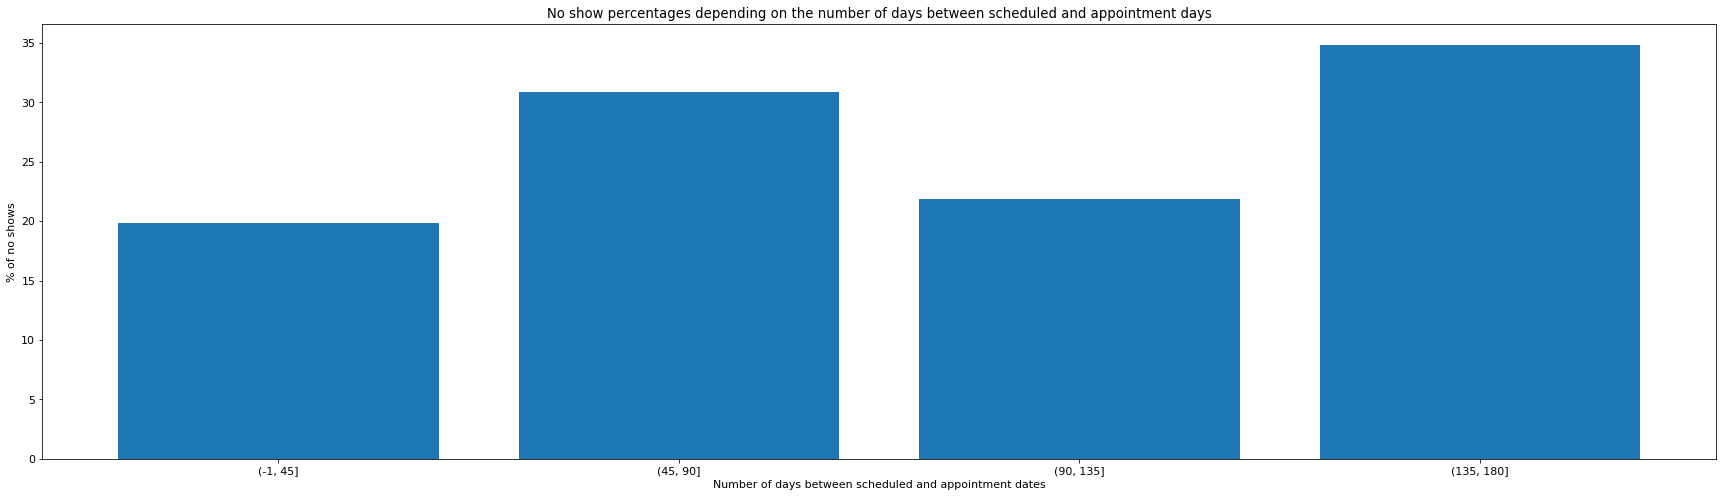

In [734]:
plot_perc_col('date_range_bins', 'No show percentages depending on the number of days between scheduled and appointment days', 'Number of days between scheduled and appointment dates')

Strangely, patients without handicap tend to miss more appointments, but the difference is very small. 

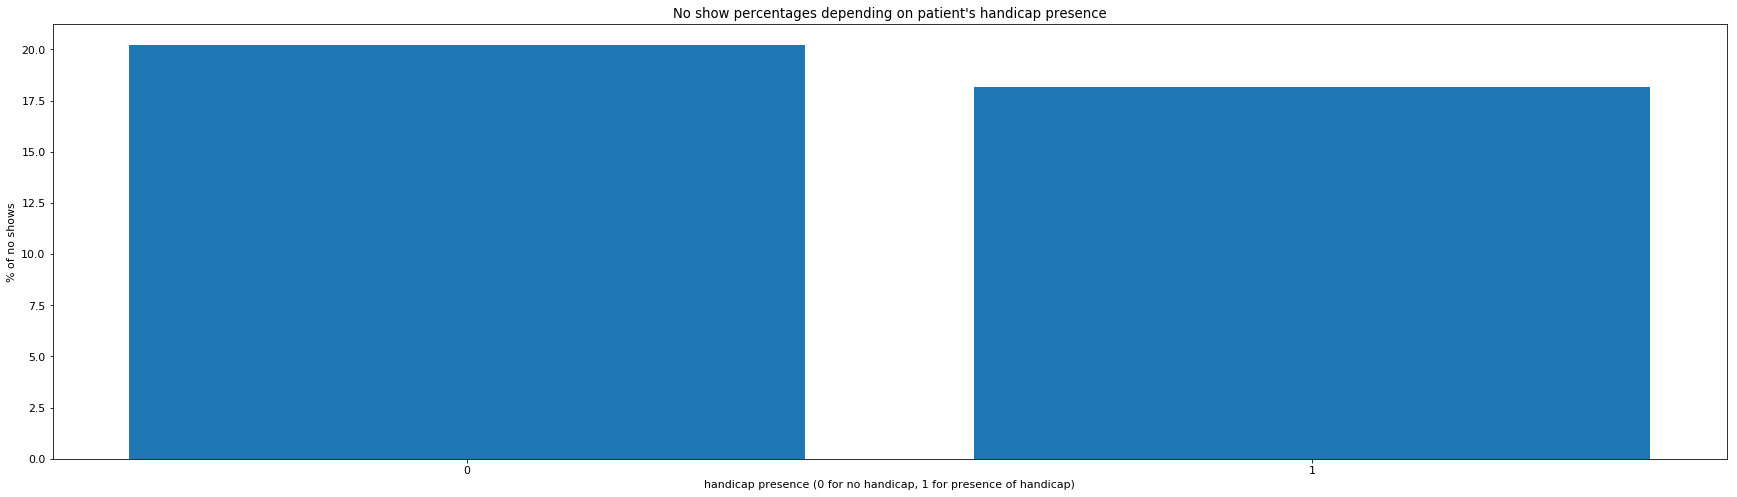

In [735]:
plot_perc_col('handicap', "No show percentages depending on patient's handicap presence", 'handicap presence (0 for no handicap, 1 for presence of handicap)')

Looks like patients who do receive sms notification reminders miss less appointments than people who don't.

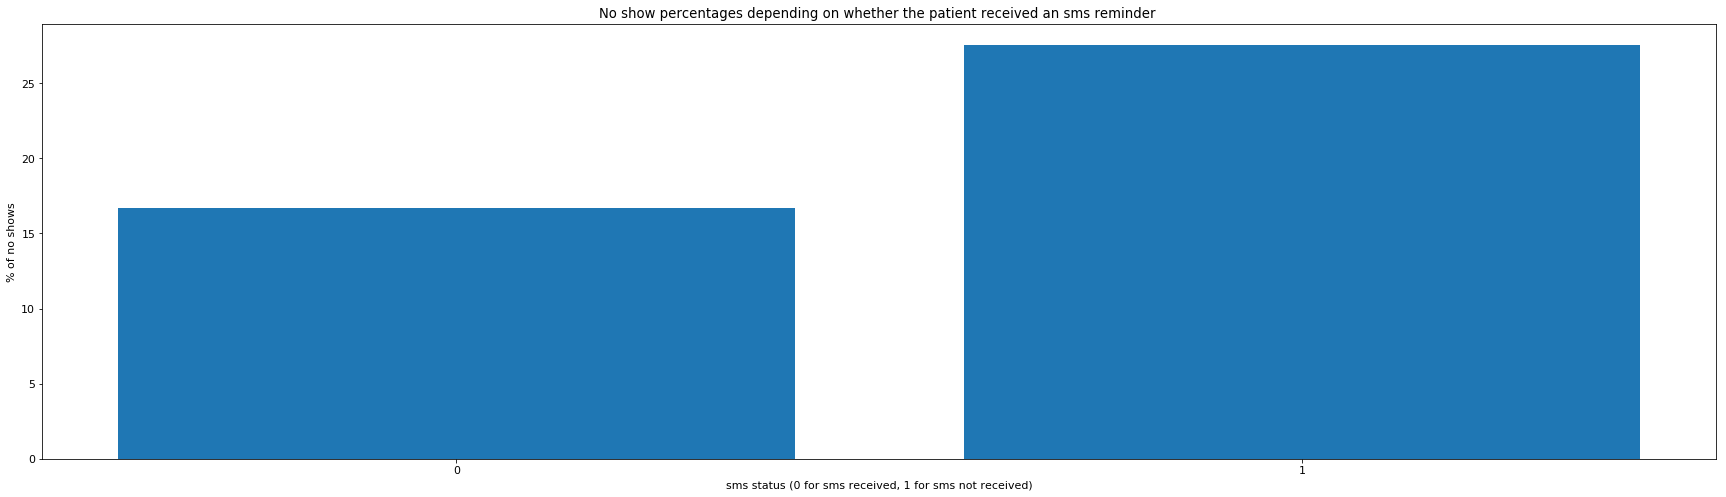

In [736]:
plot_perc_col('sms', "No show percentages depending on whether the patient received an sms reminder ", 'sms status (0 for sms received, 1 for sms not received)')

According to the chart bellow, younger patients miss more appointments than older patients.

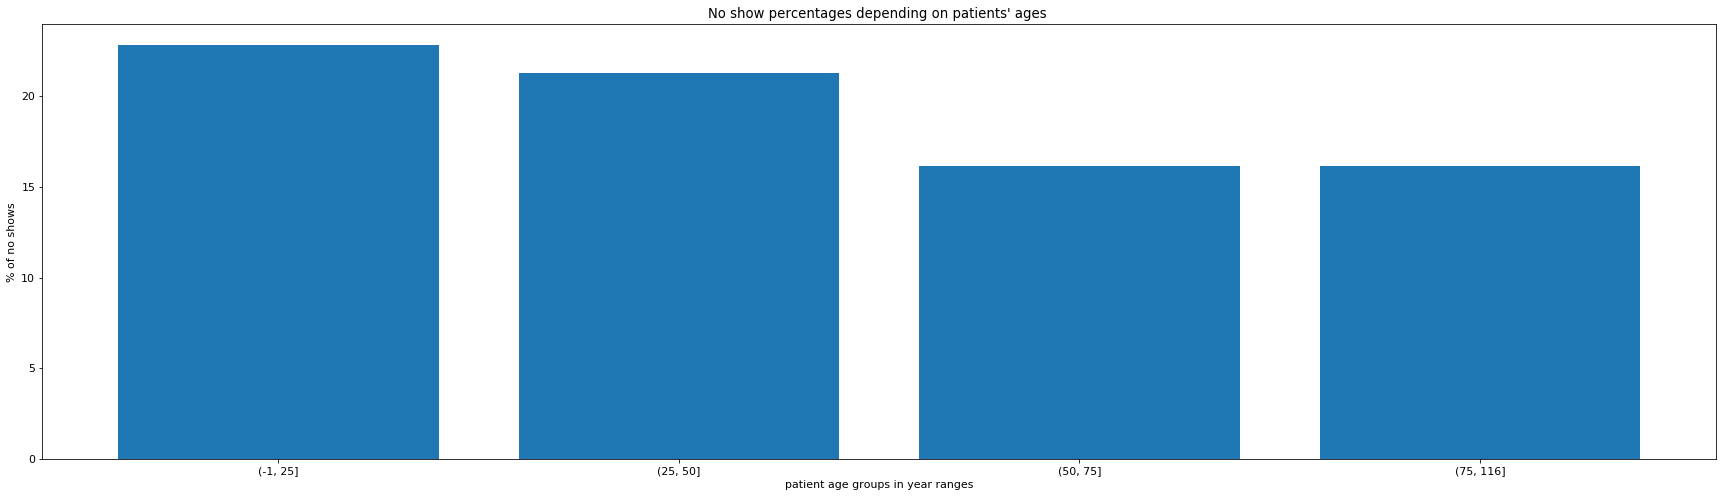

In [737]:
plot_perc_col('age_bins', "No show percentages depending on patients' ages ", 'patient age groups in year ranges')

According to our analysis, the 2 most significant factors, which can help us predict the probability of patient not showing up to their appointment are sms and age_bins. So the next step would be to look at the proportions of no shows among combinations of patients with those two parameters. On the following chart we can see that younger people who received sms notifications missed appointments less frequently than younger people who didn't. Older people's no show rate are not as much correlated with  whether they receive an sms notification.

In [738]:
df.groupby(['sms', 'age_bins', 'no_show']).size().unstack()

no_show           No   Yes
sms age_bins              
0   (-1, 25]   21760  4983
    (25, 50]   20129  4172
    (50, 75]   17273  2814
    (75, 116]   3348   566
1   (-1, 25]    8021  3835
    (25, 50]    8602  3602
    (50, 75]    7901  2043
    (75, 116]   1174   304

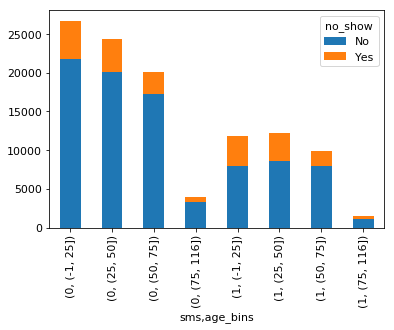

In [739]:
df.groupby(['sms', 'age_bins', 'no_show']).size().unstack().plot(kind = 'bar', stacked = True)

<a id='conclusions'></a>
## Conclusions

In our analysis, we identified the parameters, which are likely to contribute to the frequnecy of no shows in the group of patients with those parameters. 
Given that we are not using statistical tools, we cannot imply causation from the correlations in our analysis. We would be able to assess the significance of neigborhood of the patient if we had data about how far each of those neigborhoods is located from the hospital. 
Another possible important factor, which could have influence on the frequnecy of no shows is the time of the appointment. Since we do not have this data, unfortunately, we will not be able to find out whether this factor can contribute.

## References

- Udacity Data Analysis Nanodegree educational materials
- Matplotlib documentation from matplotlib.org
- Pandas documentation from pandas.pydata.org